# AMS 326 Numerical Analysis HW 3

By: Mehadi Chowdhury (115112722)  

Link to GitHub where README, PDF, IPYNB and Seperate Python Files will be hosted: https://github.com/EmceeCiao/AMS_326_HW3 

## Background For Problem 3.1 


<div style="text-align: center;">
    <img src="Problem_1.1.png" alt="Description" style="width:500px; border:2px solid black;"/>
</div> 

## Problem 3.1 Task X

### Problem Description 

### Algorithm Description 

#### Psuedocode 

Example of Psuedocode for MonteCarlo! 

**Monte Carlo**

$lowerbound \leftarrow 0.50 $    
$upperbound \leftarrow 0.75 $      
$lowerbound \leftarrow lowerbound * 1000000 $       
$upperbound \leftarrow upperbound * 1000000 $     
$FLOPS \leftarrow 2$   
$Iterations \leftarrow 0$    
$\text{while} \enspace True:$  
&emsp; $Iterations \enspace += 1$  
&emsp; $FLOPS \enspace += 6$   
&emsp; guess = random number    
&emsp; if abs(guess-actualroot) < tolerance:   
&emsp;&emsp; FLOPS += 1   
&emsp;&emsp; break

#### Code 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

""" 
We want to simulate tossing a disc of size d and calculating it's probability 
We do this by simply generating a random center point between 0 and 1 
This serves as the center of our circle and all we have to do is add our diameter to see if it crosses the line or not 
    - The only issue is it depends on how many lines we are crossing or attempting to cross 
        - We want to say 100 percent probability if D > than the line crossed, but if it's smaller than the line crossed we have to simulate this 
            - How though?  
            - we take the Number of lines crossed - D which gives us the left over diameter right, so if d is 2.5 we get 3 - 2.5 = 0.5 
            - We then simulate the uniform number generation, if we get 0.5 or greater we can accept otherwise reject 
            - How does this work for 4 lines, uhhhhh 4 - 2.5 is 1.5 and we never work! as we generate random from 0 to 1 
""" 

def simulate_disc_tosses(diameter, num_tosses):  
    successful_tosses = {} 
    for j in range (1, 5): # represents lines being crossed  
        print(f"Simulating Crossing {j} lines") 
        for i in range(num_tosses): 
            if diameter >= j: 
                successful_tosses[j] = num_tosses
                break  
            else: 
                center = np.random.uniform(0, 1)  
                if center >= j - diameter:  
                    successful_tosses[j] = successful_tosses.get(j, 0) + 1 
    probabilities = [] 
    for value in successful_tosses.values():  
        probabilities.append(value/num_tosses)  
    print(f"Probabilities for {diameter}")
    return probabilities # Full array of probabilities for it crossing x-line, meaning 1, 2, 3, 4   

def monte_carlo_disc_toss(diameters, num_tosses): 
    # So now this function will actually run this simulation and store the crossing probabilities for each thing  
    crossing_probabilities = {} 
    for diameter in diameters:  
        print(f"Simulating Diameter: {diameter}") 
        probabilities = simulate_disc_tosses(diameter, num_tosses)  
        crossing_probabilities[diameter] = probabilities  
    return crossing_probabilities  

diameters = [1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 15/10, 20/10, 30/10] 
num_tosses = 4444444 

print(monte_carlo_disc_toss(diameters, num_tosses))

                




Simulating diameter 0.1...
Simulating diameter 0.2...
Simulating diameter 0.3...
Simulating diameter 0.4...
Simulating diameter 0.5...
Simulating diameter 0.6...
Simulating diameter 0.7...
Simulating diameter 0.8...
Simulating diameter 0.9...
Simulating diameter 1.0...
Simulating diameter 1.5...
Simulating diameter 2.0...
Simulating diameter 3.0...

Results:
| Diameter (d) | P(1+ lines) | P(2+ lines) | P(3+ lines) | P(4+ lines) |
|-------------|-------------|-------------|-------------|-------------|
| 0.10        |      9.9911% |      0.0000% |      0.0000% |      0.0000% |
| 0.20        |     19.9861% |      0.0000% |      0.0000% |      0.0000% |
| 0.30        |     30.0123% |      0.0000% |      0.0000% |      0.0000% |
| 0.40        |     40.0263% |      0.0000% |      0.0000% |      0.0000% |
| 0.50        |     49.9653% |      0.0000% |      0.0000% |      0.0000% |
| 0.60        |     60.0061% |      0.0000% |      0.0000% |      0.0000% |
| 0.70        |     70.0245% |      0.

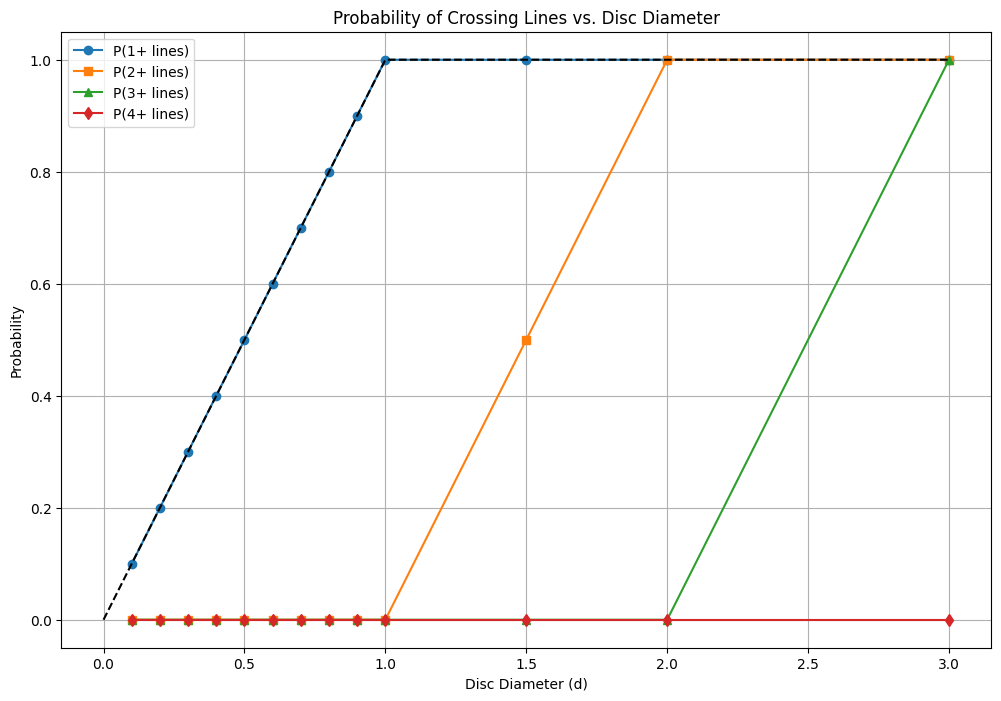

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_disc_crossings(diameter, num_tosses):
    """
    Simulates tosses of a disc with given diameter between parallel lines with distance 1.
    
    Parameters:
    - diameter (float): Diameter of the disc
    - num_tosses (int): Number of tosses to simulate
    
    Returns:
    - Dictionary with probabilities of crossing different numbers of lines
    """
    # Array to store how many lines each toss crosses
    crossings = np.zeros(num_tosses, dtype=int)
    
    # For each toss, generate a random y-position for the center of the disc
    # The center can be anywhere between 0 and 1 (considering periodicity)
    y_positions = np.random.uniform(0, 1, num_tosses)
    
    # Calculate how many lines each toss crosses
    # A disc crosses a line if the distance from its center to the line is <= radius
    radius = diameter / 2
    
    # Check crossing with the line at y=0
    crosses_bottom = y_positions <= radius
    
    # Check crossing with the line at y=1
    crosses_top = y_positions >= (1 - radius)
    
    # Count crossings
    crossings += crosses_bottom
    crossings += crosses_top
    
    # For larger discs, check additional lines (y=-1, y=2, etc.)
    if diameter > 1:
        # Check line at y=-1
        crosses_below = y_positions <= (radius - 1)
        crossings += crosses_below
        
        # Check line at y=2
        crosses_above = y_positions >= (2 - radius)
        crossings += crosses_above
        
    # For even larger discs, check more lines if necessary
    if diameter > 3:
        # Check line at y=-2
        crosses_far_below = y_positions <= (radius - 2)
        crossings += crosses_far_below
        
        # Check line at y=3
        crosses_far_above = y_positions >= (3 - radius)
        crossings += crosses_far_above
    
    # Calculate probabilities for crossing different numbers of lines
    max_possible_crossings = int(np.ceil(diameter)) + 1
    probabilities = {}
    
    for i in range(1, max_possible_crossings + 1):
        probabilities[i] = np.sum(crossings >= i) / num_tosses
    
    return probabilities

# Set parameters
num_tosses = 4444444
diameters = [1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 15/10, 20/10, 30/10]

# Run simulations and collect results
results = {}
for d in diameters:
    print(f"Simulating diameter {d}...")
    results[d] = simulate_disc_crossings(d, num_tosses)

# Display results in a table
print("\nResults:")
print("| Diameter (d) | P(1+ lines) | P(2+ lines) | P(3+ lines) | P(4+ lines) |")
print("|-------------|-------------|-------------|-------------|-------------|")

for d in diameters:
    row = f"| {d:<11.2f} "
    for i in range(1, 5):
        if i in results[d]:
            row += f"| {results[d][i]*100:>11.4f}% "
        else:
            row += f"| {0:>11.4f}% "
    print(row + "|")

# Create plots
plt.figure(figsize=(12, 8))

# Plot probability of crossing at least 1 line
plt.plot(diameters, [results[d][1] for d in diameters], 'o-', label='P(1+ lines)')

# Plot probability of crossing at least 2 lines
two_line_probs = [results[d].get(2, 0) for d in diameters]
plt.plot(diameters, two_line_probs, 's-', label='P(2+ lines)')

# Plot probability of crossing at least 3 lines (if available)
three_line_probs = [results[d].get(3, 0) for d in diameters]
plt.plot(diameters, three_line_probs, '^-', label='P(3+ lines)')

# Plot probability of crossing at least 4 lines (if available)
four_line_probs = [results[d].get(4, 0) for d in diameters]
plt.plot(diameters, four_line_probs, 'd-', label='P(4+ lines)')

plt.xlabel('Disc Diameter (d)')
plt.ylabel('Probability')
plt.title('Probability of Crossing Lines vs. Disc Diameter')
plt.grid(True)
plt.legend()

# Theoretical results for comparison
d_fine = np.linspace(0, 3, 100)
p_theoretical = np.minimum(d_fine, 1)  # Theoretical formula for P(1+ lines) when d <= 1
plt.plot(d_fine, p_theoretical, 'k--', label='Theoretical P(1+ lines) when d ≤ 1')

plt.savefig('disc_crossing_probabilities.png')
plt.show()

### Results 


### Performance 


## Background For Problem 3.2


<div style="text-align: center;">
    <img src="Problem_1.1.png" alt="Description" style="width:500px; border:2px solid black;"/>
</div> 

## Problem 3.2 Task 1

### Problem Description 

### Algorithm Description 

#### Psuedocode 

Example of Psuedocode for MonteCarlo! 

**Monte Carlo**

$lowerbound \leftarrow 0.50 $    
$upperbound \leftarrow 0.75 $      
$lowerbound \leftarrow lowerbound * 1000000 $       
$upperbound \leftarrow upperbound * 1000000 $     
$FLOPS \leftarrow 2$   
$Iterations \leftarrow 0$    
$\text{while} \enspace True:$  
&emsp; $Iterations \enspace += 1$  
&emsp; $FLOPS \enspace += 6$   
&emsp; guess = random number    
&emsp; if abs(guess-actualroot) < tolerance:   
&emsp;&emsp; FLOPS += 1   
&emsp;&emsp; break
#### Code 

In [12]:
import numpy as np
# Function to simulate the toss of a disc
def toss_disc(num_tosses, lines_crossed):
    """
    Simulates the toss of a disc and calculates the probability of crossing the
    given lines.
    Parameters:
    - num_tosses (int): Number of tosses to simulate.
    - lines_crossed (list): A list containing the positions of the lines
    crossed.
    Returns:
    - float: The probability of crossing the lines.
    """
    num_crossings = 0
    for _ in range(num_tosses):
        position = np.random.uniform(0, 1)
        if lines_crossed[0] <= position <= lines_crossed[1]:
            num_crossings += 1
    return num_crossings / num_tosses
# Function to calculate the probabilities of crossing lines for different diameters
def calculate_probabilities(d_values, num_tosses):
    """
    Calculates the probabilities of crossing lines for different diameters of
    the disc.
    Parameters:
    - d_values (list): List of diameters to calculate probabilities for.
    - num_tosses (int): Number of tosses for each diameter.
    Returns:
    - dict: A dictionary containing probabilities for each diameter.
    """
    probabilities = {}
    for d in d_values:
        crossing_probs = []
        for i in range(4):
            if d > 1 and i + 1 <= d:
                crossing_probs.append(1.0) # If the diameter is greater than 1 and the number of lines crossed is less than the diameter, probability is 1
            else:
                lines_crossed = [i / d, min((i + 1) / d, d)] # Calculate the position of lines crossed
                crossing_probs.append(toss_disc(num_tosses, lines_crossed))
        probabilities[d] = crossing_probs
    return probabilities
# Given diameters
d_values = [0.1, 0.5, 1.5, 2.0, 3.0]
num_tosses = 1444444
# Calculate probabilities
probabilities = calculate_probabilities(d_values, num_tosses)
# Print results in a table format
print("| Diameter (d) | Probability for Crossing 1 line | Probability for Crossing 2 lines | Probability for Crossing 3 lines | Probability for Crossing 4 lines |")
for d in d_values:
    print(f"| {d:<13} | {probabilities[d][0]*100:<30.2f}% | {probabilities[d][1]*100:<29.2f}% | {probabilities[d][2]*100:<29.2f}% | {probabilities[d][3]*100:<29.2f}% |")

| Diameter (d) | Probability for Crossing 1 line | Probability for Crossing 2 lines | Probability for Crossing 3 lines | Probability for Crossing 4 lines |
| 0.1           | 10.01                         % | 0.00                         % | 0.00                         % | 0.00                         % |
| 0.5           | 50.01                         % | 0.00                         % | 0.00                         % | 0.00                         % |
| 1.5           | 100.00                        % | 33.34                        % | 0.00                         % | 0.00                         % |
| 2.0           | 100.00                        % | 100.00                       % | 0.00                         % | 0.00                         % |
| 3.0           | 100.00                        % | 100.00                       % | 100.00                       % | 0.00                         % |


### Results 


### Performance 



## Background For Problem 3.3 

<div style="text-align: center;">
    <img src="Problem_3.3.png" alt="Problem_3.3.png" style="width:1200px; border:2px solid black;"/>
</div> 



## Problem 3.3

### Problem Description 

Given a DE for the velocity of a plane starting at (a, 0) and approaching the airport at (0, 0) being the following:  

$$
\begin{cases} 
\dfrac{dy}{dx} = \dfrac{y}{x} - k\sqrt{1 + \left(\dfrac{y}{x}\right)^2} \\ 
y(x = a) = 0
\end{cases}  
$$
where $k = \dfrac{w}{v_0}$ 

Solve the DE given the values $a = 100$, $w = 44$, and $v_0 = 88$. Please use any solution method including Euler's methods and the Runge-Kutta to compute the plane's trajectory until it lands at the airport.  

### Algorithm Description  

To solve this ODE, I decided to use Euler's forward method as it was straightforward to understand and code. The essential idea behind Euler's forward method is that from any point on a curve, we can get an approximation of a nearby point by moving along the tangent line. In our case since we are given the slope at a point (the differential) and the anchor point to start (a, 0), we have everything needed to do so, we simply need to decide a value of h, which in this case I chose 0.0001 for more accuracy without running into a division of 0 error in the formuala.

More formally this was derived by taking the forward difference approximation of a derivative and solving: 

$y'(x)\approx (y(x+h) - y(x))/h$   
$y(x+h) \approx y(x) + h * y'(x)$     
$y' = f(x, y(x))$        
$y(x+h) \approx y(x) + h * f(x, y(x))$    

So with a step size of h we construct the sequence:  
$x_0, x_1 = x_0 + h, x_2 = x_1 + h, ....$ and the numerical solutions are
$y_{n+1} \approx y_{n} + h * f(x_n, y_n)$

So using the sequence above we can construct the trajectory of the plane. The only caveats I had to account for was that we wanted x to change negatively as our target of (0, 0) was the stopping point for this trajectory, so instead of adding h I subtracted by h for calculating the next $x_n$ meaning we also needed to change the sign for calculating $y_{n+1}$ as I needed to subtract from $y_n$ now. Additionally, I graphed the trajectory of the curve and printed 100 points on the trajectory to visualize the trajectory that's been constructed. I also put in a safe guard to make sure our answer did not overshoot hitting x = 0, by changing the step size at the very end if it was closer than h away. 

#### Psuedocode 

**Euler Forward Method**  
$a \leftarrow 100$    
$w \leftarrow 44$    
$v_0 \leftarrow 88$    
$x_0 \leftarrow a$    
$y_0 \leftarrow 0$    
$target \leftarrow 0$    
$k \leftarrow w/v_0$  
$h \leftarrow 0.0001$   
$f \leftarrow (y/x) - (k * \sqrt{1 + ((y/x)^2)})$     

$x\_vals \leftarrow [x_0]$    
$x\_vals \leftarrow [y_0]$    

$\text{while} \enspace x\_vals[-1] > target:$  
&emsp;  $y_n = y\_vals[-1]$     
&emsp;  $x_n = x\_vals[-1]$     
&emsp;  if $x_n - h < target:$    
&emsp;&emsp; $h = x_n - target$        
&emsp;  $y\_next = y_n - h*(f(x_n, y_n))$    
&emsp;  $x\_next = x_n - h$     
return $x\_vals, y\_vals$    

#### Code 

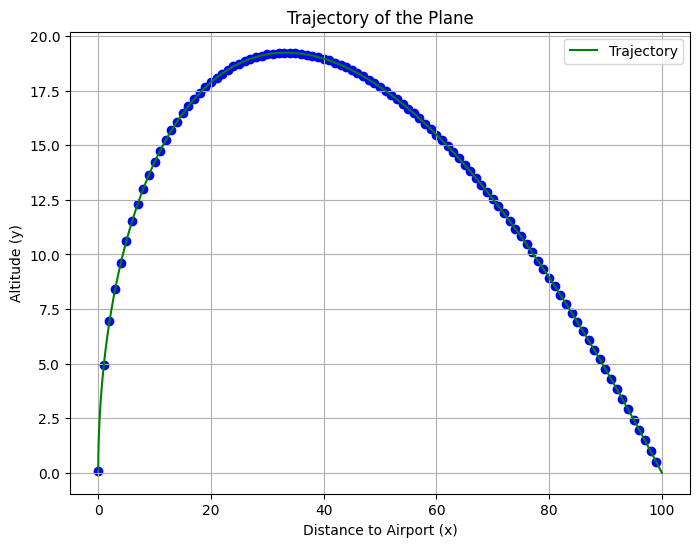

Coordinates (x, y) of 100 evenly spaced points: 
(0.00, 0.03)
(1.00, 4.95)
(2.00, 6.93)
(3.00, 8.40)
(4.00, 9.60)
(5.00, 10.62)
(6.00, 11.51)
(7.00, 12.30)
(8.00, 13.01)
(9.00, 13.65)
(10.00, 14.23)
(11.00, 14.76)
(12.00, 15.24)
(13.00, 15.68)
(14.00, 16.09)
(15.00, 16.46)
(16.00, 16.80)
(17.00, 17.11)
(18.00, 17.39)
(19.00, 17.65)
(20.00, 17.89)
(21.00, 18.10)
(22.00, 18.29)
(23.00, 18.46)
(24.00, 18.62)
(25.00, 18.75)
(26.00, 18.87)
(27.00, 18.97)
(28.00, 19.05)
(29.00, 19.12)
(30.00, 19.17)
(31.00, 19.21)
(32.00, 19.23)
(33.00, 19.24)
(34.00, 19.24)
(35.00, 19.23)
(36.00, 19.20)
(37.00, 19.16)
(38.00, 19.11)
(39.00, 19.05)
(40.00, 18.97)
(41.00, 18.89)
(42.00, 18.79)
(43.00, 18.69)
(44.00, 18.57)
(45.00, 18.45)
(46.00, 18.31)
(47.00, 18.17)
(48.00, 18.01)
(49.00, 17.85)
(50.00, 17.68)
(51.00, 17.50)
(52.00, 17.31)
(53.00, 17.11)
(54.00, 16.90)
(55.00, 16.69)
(56.00, 16.46)
(57.00, 16.23)
(58.00, 15.99)
(59.00, 15.75)
(60.00, 15.49)
(61.00, 15.23)
(62.00, 14.96)
(63.00, 14.68)
(64.00

In [51]:
import numpy as np
import matplotlib.pyplot as plt
# Defining Given Constants with a little bit of math 
a = 100 # Distance from airport
w = 44  # wind speed 
v_0 = 88 # initial velocity 
x_0 = a  # initial x_value 
y_0 = 0  # initial y_value 
h = 0.0001 # Step size used for difference approximation
k = w/v_0 # constant factor in ODE

def f(x, y):  
    """Differential Equation from ODE"""
    return (y/x) - (k * np.sqrt(1 + ((y/x) ** 2)))   

def euler_forward(f, x_0, y_0, h, target):  
    # Start Making Arrays to hold x_values and y_values of sequence
    x_values = [x_0] 
    y_values = [y_0]  

    # Condition is > target as we are decreasing x
    while x_values[-1] > target:  
        y_n = y_values[-1]  
        x_n = x_values[-1]  

        # Safegaurd to prevent approximation from overshooting
        if x_n - h < target: 
            h = x_n - target 
        
        # Euler Forward Sequences, - instead of + as h needs to be - 
        y_next = y_n - (h * f(x_n, y_n))
        x_next = x_n - h 

        # We append the values as we reference the last index in the equation for x_n, y_n
        y_values.append(y_next) 
        x_values.append(x_next)   
        
    # Reversed the arrays for ease of printing 
    return np.array(x_values[::-1]), np.array(y_values[::-1])

x_vals, y_vals = euler_forward(f, x_0, y_0, h, 0) 

# print(x_vals[0]) 
# print(y_vals[0])  
# print(len(x_vals)) 
# print(len(y_vals))

plt.figure(figsize=(8,6))  
plt.plot(x_vals[1::], y_vals[1::], color="green", label="Trajectory") 
plt.scatter(x_vals[1::int(len(x_vals)/100)], y_vals[1::int(len(x_vals)/100)], color="blue") 
plt.xlabel("Distance to Airport (x)") 
plt.ylabel("Altitude (y)") 
plt.title("Trajectory of the Plane") 
plt.legend() 
plt.grid(True) 
plt.show()

# Print Coordinates
print("Coordinates (x, y) of 100 evenly spaced points: ")  
step = len(x_vals) // 100
for i in range(0, len(x_vals), step): 
    print(f"({x_vals[i]:.2f}, {y_vals[i]:.2f})")


### Results 

I obtained the following Graph approximating the trajectory of the plane: 

![Problem_3.3_Trajectory_Graph](Problem_3.3_Trajectory_Graph.png)   

I also printed the following 100 points along the approximated trajectory: 
Coordinates (x, y) of 100 evenly spaced points:     
(0.00, 0.03)   
(1.00, 4.95)   
(2.00, 6.93)   
(3.00, 8.40)    
(4.00, 9.60)   
(5.00, 10.62)   
(6.00, 11.51)     
(7.00, 12.30)   
(8.00, 13.01)    
(9.00, 13.65)   
(10.00, 14.23)   
(11.00, 14.76)    
(12.00, 15.24)   
(13.00, 15.68)    
(14.00, 16.09)   
(15.00, 16.46)    
(16.00, 16.80)   
(17.00, 17.11)   
(18.00, 17.39)   
(19.00, 17.65)   
(20.00, 17.89)   
(21.00, 18.10)   
(22.00, 18.29)   
(23.00, 18.46)   
(24.00, 18.62)   
(25.00, 18.75)   
(26.00, 18.87)   
(27.00, 18.97)   
(28.00, 19.05)    
(29.00, 19.12)   
(30.00, 19.17)   
(31.00, 19.21)   
(32.00, 19.23)   
(33.00, 19.24)   
(34.00, 19.24)   
(35.00, 19.23)   
(36.00, 19.20)    
(37.00, 19.16)    
(38.00, 19.11)    
(39.00, 19.05)    
(40.00, 18.97)   
(41.00, 18.89)   
(42.00, 18.79)   
(43.00, 18.69)   
(44.00, 18.57)  
(45.00, 18.45)   
(46.00, 18.31)   
(47.00, 18.17)   
(48.00, 18.01)   
(49.00, 17.85)   
(50.00, 17.68)   
(51.00, 17.50)  
(52.00, 17.31)   
(53.00, 17.11)  
(54.00, 16.90)   
(55.00, 16.69)   
(56.00, 16.46)   
(57.00, 16.23)   
(58.00, 15.99)   
(59.00, 15.75)   
(60.00, 15.49)  
(61.00, 15.23)  
(62.00, 14.96)  
(63.00, 14.68)  
(64.00, 14.40)    
(65.00, 14.11)   
(66.00, 13.81)  
(67.00, 13.51)   
(68.00, 13.19)    
(69.00, 12.88)   
(70.00, 12.55)   
(71.00, 12.22)    
(72.00, 11.88)    
(73.00, 11.53)   
(74.00, 11.18)   
(75.00, 10.83)   
(76.00, 10.46)   
(77.00, 10.09)   
(78.00, 9.71)   
(79.00, 9.33)   
(80.00, 8.94)   
(81.00, 8.55)   
(82.00, 8.15)   
(83.00, 7.74)   
(84.00, 7.33)   
(85.00, 6.91)   
(86.00, 6.49)   
(87.00, 6.06)   
(88.00, 5.63)   
(89.00, 5.19)   
(90.00, 4.74)   
(91.00, 4.29)   
(92.00, 3.84)   
(93.00, 3.38)    
(94.00, 2.91)   
(95.00, 2.44)   
(96.00, 1.96)   
(97.00, 1.48)   
(98.00, 0.99)    
(99.00, 0.50)   
(100.00, 0.00)     

### Performance 


The performance of Euler's Forward Method is dependent on the number of points generated to show the trajectory of the plot, if we are generating n points then the time complexity is O(n) as we have to do 2n operations to calculate each point and the space complexity is O(n) as well as we need to store each point. In terms of Location Truncation Error, the error of Euler's forward method is order-1. 